In [2]:
import numpy as np
import scipy.signal as signal
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
def diode (x):
    v_t = 25.9 / 1000
    I_s = 0.2
    return I_s * (np.exp (x / v_t) - 1)

def T_Amp (V_in, I_abc):
    v_t = 25.9 / 1000
    return I_abc * (np.exp (V_in / v_t) - 1) / (np.exp (V_in / v_t) + 1)
#     return (np.exp (V_in / v_t) - 1) / (np.exp (V_in / v_t) + 1)

<IPython.core.display.Javascript object>


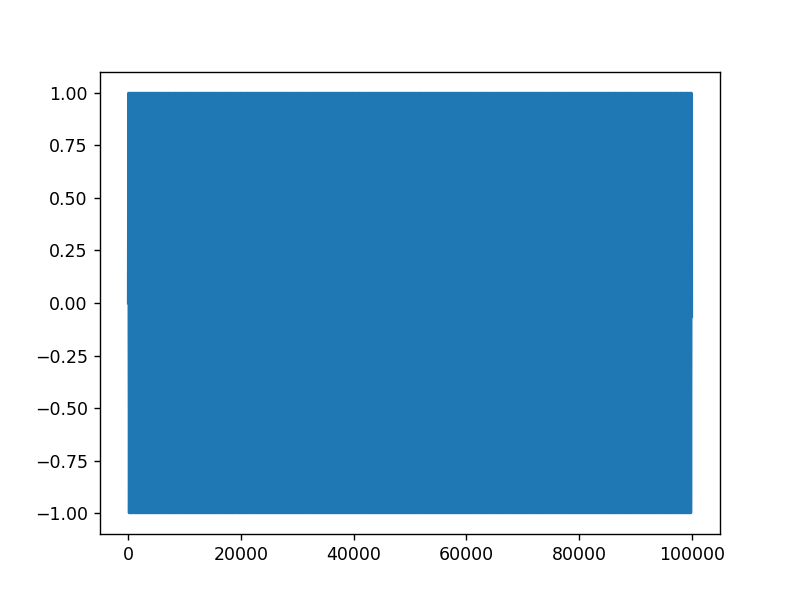

In [26]:
N = 100000
f = 200
fs = 44100
n = np.arange (N)
x = np.sin (2 * np.pi * f * n / fs)

plt.figure()
plt.plot (x)

<IPython.core.display.Javascript object>


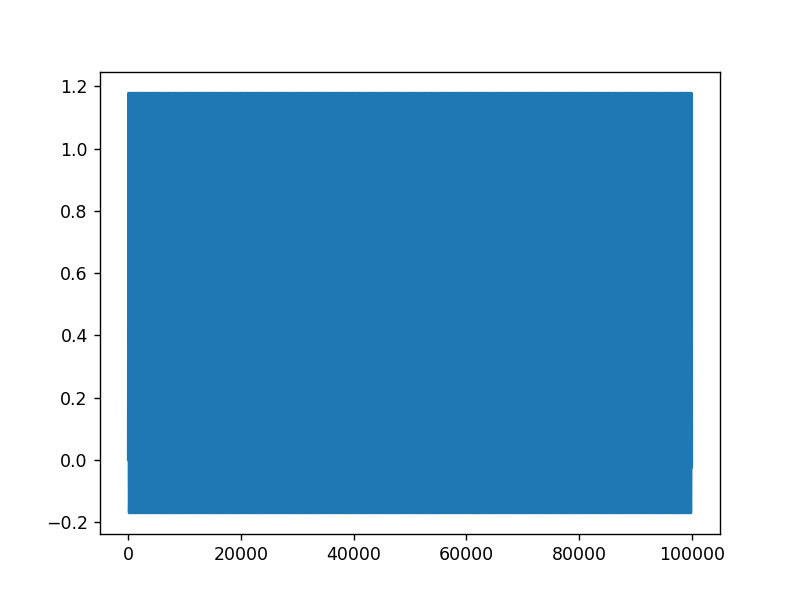

In [31]:
y_rect = diode (0.05*x)

plt.figure()
plt.plot (y_rect)

[0, 1]
[0.051, 1]


<IPython.core.display.Javascript object>


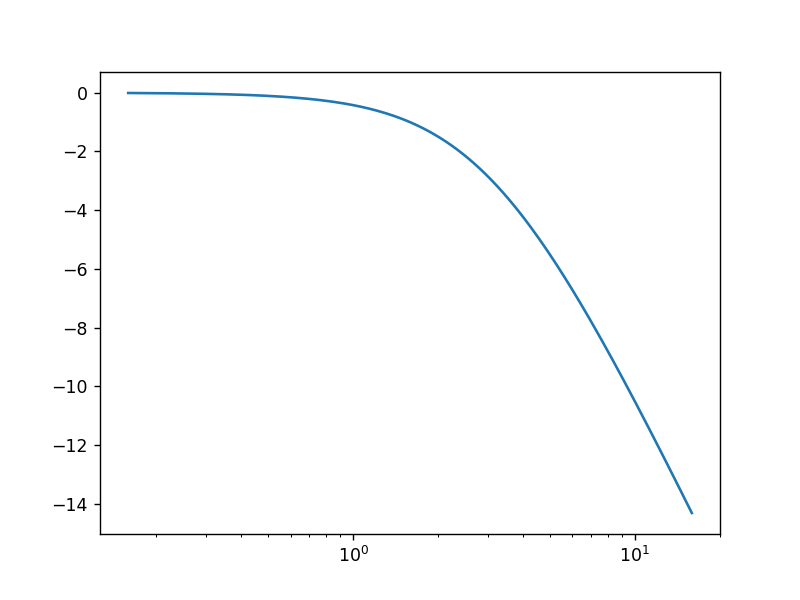

In [37]:
R_l = 510000
R_l1 = 1
C_l = 100e-9

# get output voltage from diode current
a1_l = R_l * C_l
a0_l = 1

b1_l = 0
b0_l = R_l1

print ([b1_l, b0_l])
print ([a1_l, a0_l])

w, H_l = signal.freqs ([b1_l, b0_l], [a1_l, a0_l])
plt.figure()
plt.semilogx (w / (2 * np.pi), 20 * np.log10 (np.abs (H_l)))

[5.5574698e-05 5.5574698e-05]
[ 1.         -0.99988885]


<IPython.core.display.Javascript object>


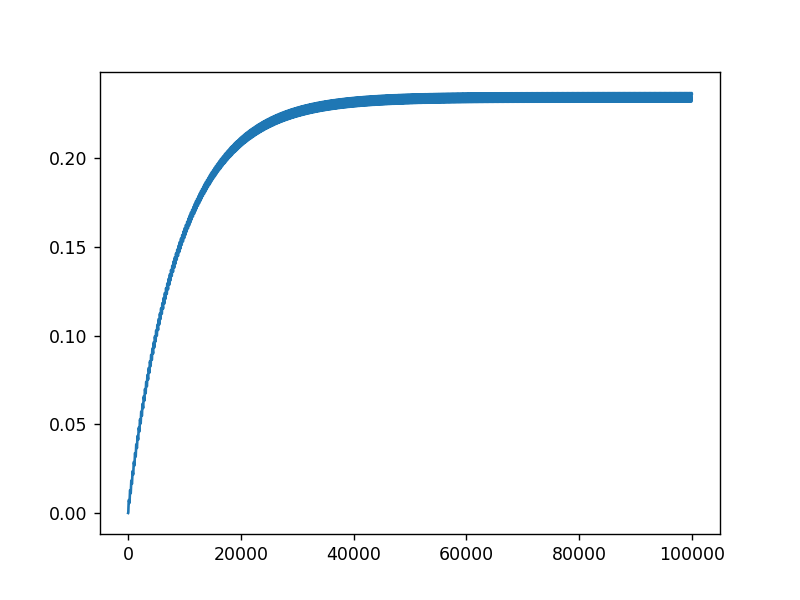

In [36]:
b_z, a_z = signal.bilinear ([b1_l, b0_l], [a1_l, a0_l], fs*4)
print (b_z)
print (a_z)

y_lim = signal.lfilter (b_z, a_z, y_rect)

plt.figure()
plt.plot (y_lim)

<IPython.core.display.Javascript object>


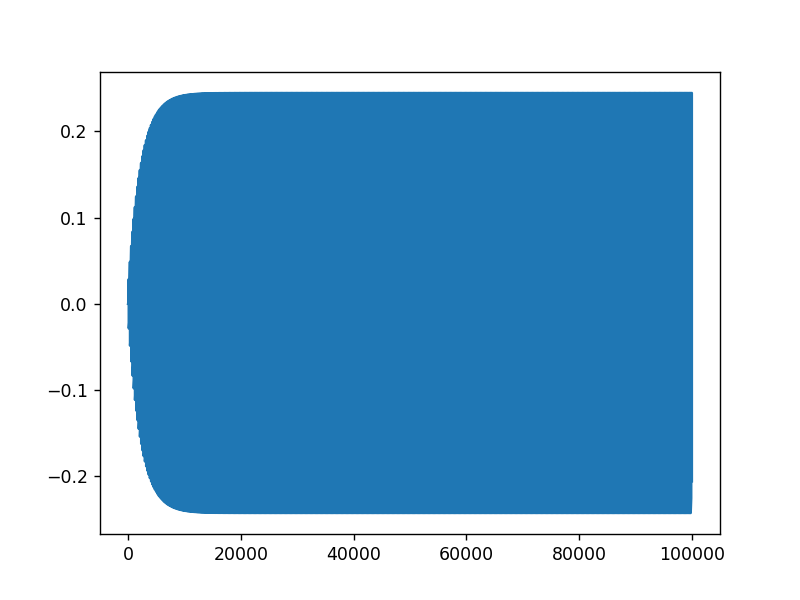

In [34]:
y = np.zeros (N)

for n in range (N):
    y[n] = T_Amp (x[n], 1*y_lim[n])
    
plt.figure()
plt.plot (y)

<IPython.core.display.Javascript object>


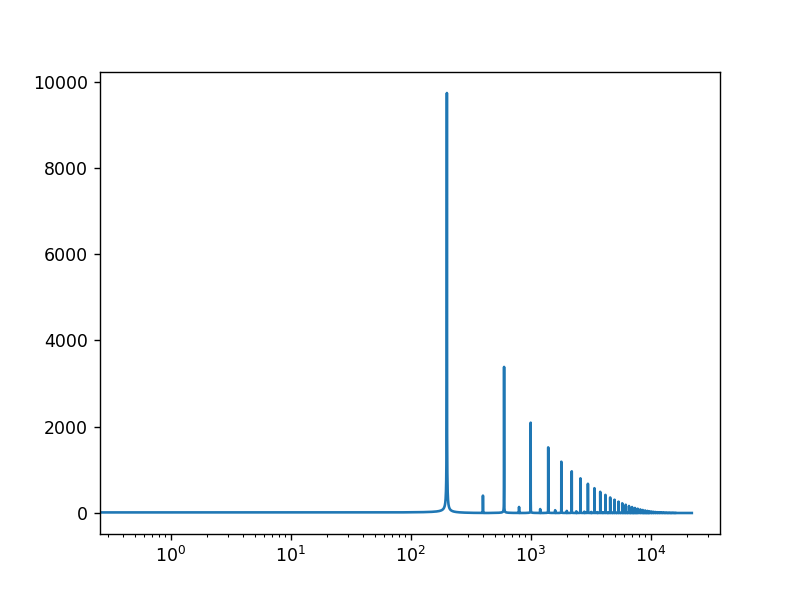

In [35]:
H_y = np.fft.rfft (y)
freqs = np.linspace (0, fs/2, int(N/2+1))

plt.figure()
plt.semilogx (freqs, np.abs (H_y))